In [158]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.filters import threshold_sauvola
from skimage import img_as_ubyte

# A command line argument.
input_name = "C:/Users/dartixus/PycharmProjects/kiv-zvi/SP/data_katastr/UAZK-B2-a-04-C-1425-002.JPG"





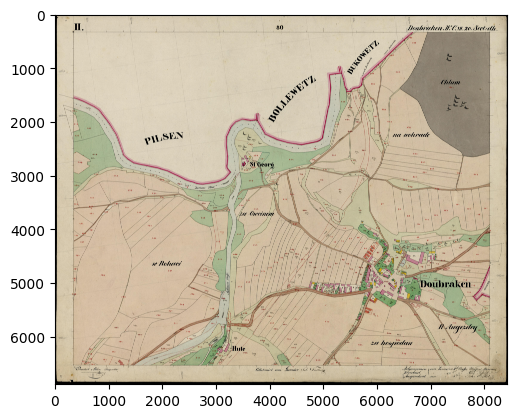

In [78]:
# It reads the image from the file.
img = cv2.cvtColor((cv2.imread(input_name,  cv2.COLOR_BGR2RGB)),  cv2.COLOR_BGR2RGB)

assert img is not None, "file could not be read, check with os.path.exists()"
# A Canny edge detector.
# img = cv2.Canny(img, 1, 500)
# Creating the kernel(2d convolution matrix)
kernel1 = np.array([[0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]])
  
plt.imshow(img)

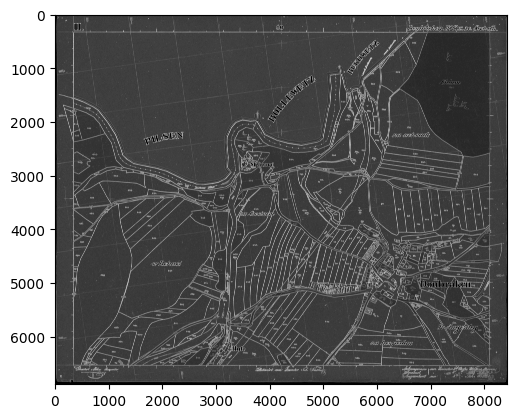

In [145]:
img = (cv2.imread(input_name, cv2.IMREAD_GRAYSCALE))
assert img is not None, "file could not be read, check with os.path.exists()"
img = threshold_sauvola(img, window_size=9, k=0.9)

plt.imshow(img, cmap="gray")

In [146]:
def get_sizes_procentual(procentual: float):
    # Taking the right xx% of the image.
    right_border = int(img.shape[1] * procentual)
    # Taking the left xx% of the image.
    left_border = int(img.shape[1] * (1 - procentual))
    # Taking the bottom xx% of the image.
    bottom_border = int(img.shape[0] * procentual)
    # Taking the top xx% of the image.
    top_border = int(img.shape[0] * (1 - procentual))
    return right_border, left_border, bottom_border, top_border

In [147]:
right_border, left_border, bottom_border, top_border = get_sizes_procentual(0.01)
print(bottom_border, top_border, right_border, left_border)
print(img.shape)
img = img[bottom_border:top_border, right_border:left_border]


68 6814 84 8337
(6883, 8422)


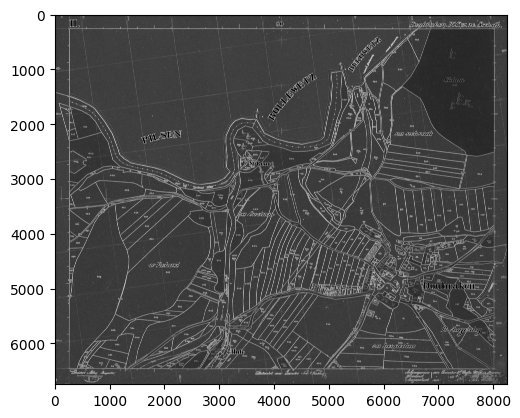

In [148]:
plt.imshow(img, cmap='gray')

In [160]:
# Taking the right 90% of the image.
right_border = int(img.shape[1] * 0.9)
# Taking the left 10% of the image.
left_border = int(img.shape[1] * 0.1)
# Taking the bottom 90% of the image.
bottom_border = int(img.shape[0] * 0.9)
# Taking the top 10% of the image.
top_border = int(img.shape[0] * 0.1)

# Taking the right, left, bottom and top border of the image.
right_border = img[:, right_border:]
left_border = img[:, :left_border]
bottom_border = img[bottom_border:, :]
top_border = img[:top_border, :]
print(top_border.shape)
top_border = top_border.astype(int)
top_border = img_as_ubyte(top_border)
print(top_border[:5])

(674, 8253)
[[24 24 24 ... 23 24 25]
 [24 24 24 ... 24 24 25]
 [25 24 24 ... 24 24 25]
 [24 24 24 ... 23 24 25]
 [24 24 24 ... 24 24 25]]


c:\Users\dartixus\PycharmProjects\kiv-zvi\venv\lib\site-packages\skimage\util\dtype.py:550: UserWarning: Downcasting int32 to uint8 without scaling because max value 105 fits in uint8
  return _convert(image, np.uint8, force_copy)


In [161]:
def euclidean_2D(x1, x2, y1, y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

# Create default parametrization LSD
lsd = cv2.createLineSegmentDetector(0)

# Detect lines in the image
lines = lsd.detect(top_border)[0]  # Position 0 of the returned tuple are the detected lines
lines = np.squeeze(lines)
distances = np.array([euclidean_2D(i[0], i[2], i[1], i[3],)  for i in lines])

In [162]:

print(distances.shape)
longest_line_index = np.argpartition(distances, -20)[-20:]
print(longest_line_index)
longest_lines = lines[longest_line_index]
longest_lines = longest_lines.astype(int)
print(longest_lines)

(1274,)
[ 673  675  892   21 1072 1073  110  287  821  750 1087  665 1062  883
  983 1022  198   92  230  193]
[[6446  265 6149  265]
 [1181  260  883  260]
 [4898  264 4598  263]
 [ 265  671  264  273]
 [7025  276 7356  276]
 [7998  279 8001  584]
 [6025  275 6545  276]
 [7378  264 7076  264]
 [6196  671 6421  464]
 [6834  278 6698  671]
 [6120  670 6547  273]
 [2730  261 2430  261]
 [6714  641 6841  277]
 [6402  419 6137  673]
 [6539  273 6111  670]
 [7075  270 7685  271]
 [2143  271 2968  271]
 [4624  274 6010  275]
 [2970  271 4616  273]
 [ 574  271 2140  271]]


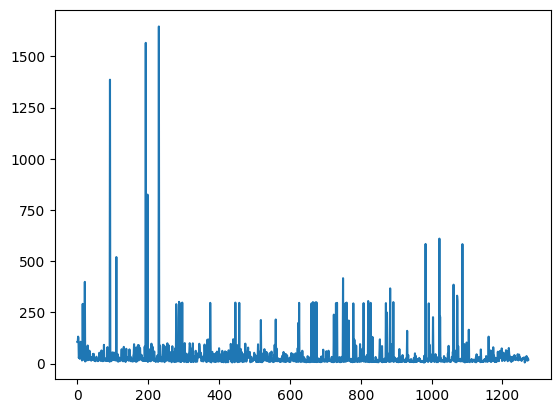

In [163]:
plt.plot(np.arange(0, len(distances)), distances)

In [ ]:

# It creates a white image with the same size as the input image.
white = np.zeros_like(top_border)
white[:] = 255

(674, 8253)


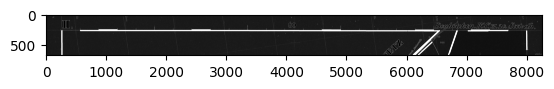

In [164]:

# Draw detected lines in the image
for i in longest_lines:
    top_border = cv2.line(top_border, (i[0], i[1]), (i[2], i[3]), (255,0,0),20)
print(top_border.shape)
# It converts the image from BGR to grayscale.
# drawn_img = cv2.cvtColor(white, cv2.COLOR_BGR2GRAY)
plt.imshow(top_border, cmap='gray')


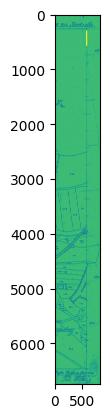

In [ ]:

# Showing the image.
plt.imshow(right_border)
plt.show()

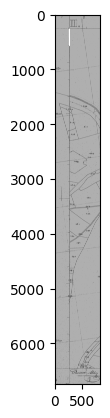

In [ ]:

plt.imshow(left_border, cmap='gray')
plt.show()

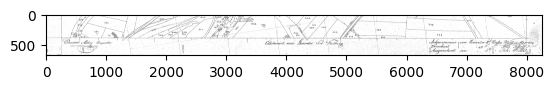

In [ ]:

plt.imshow(bottom_border, cmap='gray')
plt.show()

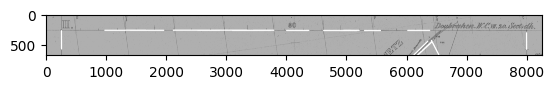

In [ ]:

plt.imshow(top_border, cmap='gray')
plt.show()

